In [85]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

In [89]:

data = pd.read_csv('file.csv')
df_reset=data.reset_index()

In [91]:
# filtering age
df_age=df_reset[(df_reset.Age > 18) &(df_reset.Age < 65)]
# filtering employment status
filter_employmnt_status = ['Employed full-time','Not employed, but looking for work',\
              'Independent contractor, freelancer, or self-employed','Employed part-time']
df_empl=df_age[df_age.EmploymentStatus.isin(filter_employmnt_status)]
# filtering gender, country, and formal education
df_filtered=df_empl.loc[(df_empl['GenderSelect']!='A different identity')&\
                        (df_empl['GenderSelect']!='Non-binary, genderqueer, or gender non-conforming')\
                       & (df_empl['Country']=='United States') & (df_empl['FormalEducation']!='I prefer not to answer')]
# filtering career switchers  who are not data scientists yet
df_career_switch=df_filtered.loc[(df_filtered['CareerSwitcher']=='Yes')&(df_filtered['CurrentJobTitleSelect']!='Data Scientist')]
# changing employment status of career switchers since they are also looking for data science jobs
df_career_switch['EmploymentStatus']=df_career_switch['EmploymentStatus'].replace('Employed full-time','Looking for data science jobs')
df_career_switch['EmploymentStatus']=df_career_switch['EmploymentStatus'].replace('Employed part-time','Looking for data science jobs')
df_career_switch['EmploymentStatus']=df_career_switch['EmploymentStatus'].replace('Independent contractor, freelancer, or self-employed','Looking for data science jobs')
# filtering data scientists who are currently employed
df_employed=df_filtered.loc[(df_filtered['CurrentJobTitleSelect']=='Data Scientist') \
                      & (df_filtered['EmploymentStatus']=='Employed full-time')]
# filtering unemployed who are looking for data science jobs
df_unemployed=df_filtered.loc[df_filtered['EmploymentStatus']=='Not employed, but looking for work']
df_unemployed['CurrentJobTitleSelect']='Unemployed'
df_unemployed['EmploymentStatus']=df_unemployed['EmploymentStatus'].replace('Not employed, but looking for work','Looking for data science jobs')
# combining all data frames
df=pd.concat([df_employed, df_unemployed,df_career_switch])


In [93]:
# creating column current job status
def empl_status(CurrentJobTitleSelect):
    if CurrentJobTitleSelect =='Data Scientist':
        return 'Employed FullTime'
    if CurrentJobTitleSelect =='Unemployed':
        return 'Unemployed'
    else:
        return 'Career Switcher'
    
df['CurrentJobStatus']=df['CurrentJobTitleSelect'].map(empl_status)

In [95]:
# polishing majors
def major(x):
    if x=='Computer Science':
        return x
    elif x=='Mathematics and Statistics':
        return x
    elif x=='Engineering (non-computer focused)':
        return 'Engineering'
    elif x=='Electrical Engineering':
        return 'Engineering'
    elif x=='A social science':
        return 'Social Science'
    elif x=='Psychology':
        return 'Social Science'
    elif x=="Physics":
        return x
    elif x=='Biology':
        return "Health Science and Biology"
    elif x=='A health science':
        return "Health Science and Biology"
    elif x=='A humanities discipline':
        return "Humanities and Art"
    elif x=='Fine arts or performing arts':
        return "Humanities and Art"
    elif x=='Information technology, networking, or system administration':
        return "Information Technology and Managment"
    elif x=='Management information systems':
        return "Information Technology and Managment"
    elif x=='I never declared a major':
        return 'No declared major'
    else:
        return x
df['Major']=df['MajorSelect'].map(major)

In [97]:
# categorizing age into categories
def age_cat(Age):
    if Age<=30:
        return '30 and less'
    if Age >30 and Age <=40:
        return '30 - 40'
    if Age >40  and Age <=50:
        return '40 - 50'
    if Age>50:
        return "over 50"
df['Age_cat']=df['Age'].apply(age_cat)

In [1211]:
df1=df[['GenderSelect','Age_cat','FormalEducation','Major',\
        'Tenure_cont','FirstTrainingSelect','EmploymentStatus',\
       'LearningCategoryWork','LearningCategorySelftTaught',\
       'LearningCategoryOnlineCourses','LearningCategoryUniversity',\
       'LearningCategoryKaggle', 'CurrentJobStatus']].reset_index()

In [1212]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 14 columns):
index                            1498 non-null int64
GenderSelect                     1496 non-null object
Age_cat                          1498 non-null object
FormalEducation                  1473 non-null object
Major                            1340 non-null object
Tenure_cont                      1453 non-null float64
FirstTrainingSelect              1454 non-null object
EmploymentStatus                 1498 non-null object
LearningCategoryWork             1420 non-null float64
LearningCategorySelftTaught      1418 non-null float64
LearningCategoryOnlineCourses    1419 non-null float64
LearningCategoryUniversity       1420 non-null float64
LearningCategoryKaggle           1420 non-null float64
CurrentJobStatus                 1498 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 163.9+ KB


In [1213]:
for i in enumerate(JobStatus):
    print (i)


(0, 'EmployedFullTime')
(1, 'Unemployed')
(2, 'Switcher')


In [1214]:
df_new = pd.DataFrame(columns=['Gender','Status','Percentage'])
JobStatus=list(df1.CurrentJobStatus.unique())
for i in JobStatus:
    y=df1[df1['CurrentJobStatus']==i]
    data=pd.DataFrame(y['GenderSelect'].value_counts(normalize=True)).reset_index()
    data['CurrentJobStatus']=i
    for index, row in data.iterrows():
        df_new=df_new.append({'Gender':row['index'], \
                              'Status':row['CurrentJobStatus'],\
                              'Percentage':row['GenderSelect']},\
                             ignore_index=True)
    
        df5=pd.pivot_table(df_new, index=['Gender'], values=['Percentage'], \
                   columns='Status',aggfunc='sum').T.reset_index().iloc[:,1:].\
        sort_values(by='Male',ascending=True)

print (df5)    

Gender            Status  Female  Male
2       Unemployed       0.290   0.710
1       Switcher         0.207   0.793
0       EmployedFullTime 0.179   0.821


In [ ]:
plt.style.use('ggplot')
ax=df_filtered.plot.barh(stacked=True,color=['teal', 'darkslateblue'], alpha=.7,figsize=(10,5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} %'.format(width*100), (p.get_x()+.5*width, p.get_y()+.4*height),size=15)
ax.set_facecolor('white')
ax.get_xaxis().set_ticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(df_filtered['Status'], size =20,family='serif', color='black')
leg=ax.legend(['Female', 'Male'], loc='best', \
          fontsize=10,bbox_to_anchor=(1, .7),prop={'size':20}) 
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
ax.yaxis.grid(False)
plt.show()

KeyError: 'Status'

In [1216]:
df2=df1.groupby(['GenderSelect','CurrentJobStatus']).agg({'index': 'count'})
df3= df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

df5=pd.pivot_table(df3, index=['GenderSelect'], values=['index'], \
                   columns='CurrentJobStatus',aggfunc='mean').T.reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)
df3


,GenderSelect,CurrentJobStatus,index
0,Female,EmployedFullTime,36.474
1,Female,Switcher,23.100
2,Female,Unemployed,40.426
3,Male,EmployedFullTime,47.129
4,Male,Switcher,24.936
5,Male,Unemployed,27.935


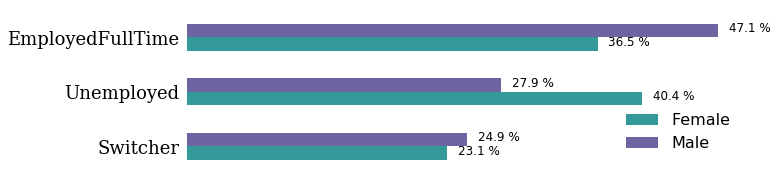

In [1217]:
ax = df5[[ 'Female','Male']].plot(kind='barh',
              figsize=(10,3), color=['teal','darkslateblue'],\
                                  fontsize=13, alpha=.8)

for i in ax.patches:
        ax.text(i.get_width()+.96, i.get_y()+.10, \
            '{:.1f} %'.format(i.get_width()), fontsize=12)
leg=ax.legend([ 'Female', 'Male'], loc='lower right', \
          fontsize=10,prop={'size':16},bbox_to_anchor=(1, .05)) 
ax.set_facecolor('white')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.get_xaxis().set_ticks([])
ax.set_yticklabels(df5['CurrentJobStatus'], size =18,family='serif', color='black')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')


In [1218]:
df1['Major'].value_counts()

Engineering                             283
Computer Science                        275
Mathematics or statistics               244
Social Science                          144
Physics                                 114
Other                                   89 
Health Science and Biology              77 
Information Technology and Managment    58 
Humanities and Art                      51 
No declared major                       5  
Name: Major, dtype: int64

In [1219]:
df4b['FormalEducation'].value_counts()

Some college         2
Bachelor's degree    2
Master's degree      2
Doctoral degree      2
Name: FormalEducation, dtype: int64

In [1220]:
df2a=df1.loc[df1['CurrentJobStatus']=='EmployedFullTime']
df3a=df2a.groupby(['GenderSelect','FormalEducation']).agg({'index': 'count'})
df4a= df3a.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4a['FormalEducation']=df4a['FormalEducation'].replace("Some college/university study \
without earning a bachelor's degree",'Some college')
df5a=pd.pivot_table(df4a, index=['GenderSelect'], values=['index'], \
                   columns='FormalEducation',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)
df5a

df2b=df1.loc[df1['CurrentJobStatus']!='EmployedFullTime']
df3b=df2b.groupby(['GenderSelect','FormalEducation']).agg({'index': 'count'})
df4b= df3b.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4b['FormalEducation']=df4b['FormalEducation'].replace("Some college/university study \
without earning a bachelor's degree",'Some college')
df4b['FormalEducation']=df4b['FormalEducation'].replace("I did not complete any formal education past high school",'High school')
df5b=pd.pivot_table(df4b, index=['GenderSelect'], values=['index'], \
                   columns='FormalEducation',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)

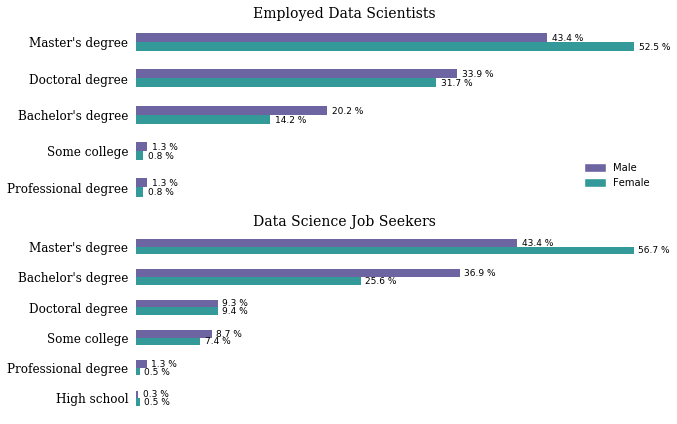

In [1221]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
plt.tight_layout(h_pad=.5)

df5a[[ 'Female','Male']].plot(kind='barh',
               color=['teal','darkslateblue'],ax=ax[0],fontsize=13, alpha=.8)
ax[0].set_title('Employed Data Scientists',\
                  x=.4, fontsize=14,family='serif')
for i in ax[0].patches:
        ax[0].text(i.get_width()+.5, i.get_y()+.04, \
            '{:.1f} %'.format(i.get_width()), fontsize=9)
leg=ax[0].legend(['Male','Female'], loc='lower right', \
          fontsize=10,prop={'size':10},bbox_to_anchor=(1, .05)) 
leg.legendHandles[0].set_color('darkslateblue')
leg.legendHandles[1].set_color('teal')
ax[0].set_facecolor('white')
ax[0].yaxis.set_ticks_position('none')
ax[0].xaxis.set_ticks_position('none')
ax[0].get_xaxis().set_ticks([])
ax[0].set_yticklabels(df5a['FormalEducation'],
                      size =12,family='serif', color='black')

leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

df5b[[ 'Female','Male']].plot(kind='barh',
               color=['teal','darkslateblue'],ax=ax[1],fontsize=13, alpha=.8)

for i in ax[1].patches:
        ax[1].text(i.get_width()+.5, i.get_y()+.04, \
            '{:.1f} %'.format(i.get_width()), fontsize=9)
ax[1].set_title('Data Science Job Seekers',\
                  x=.4, fontsize=14,family='serif')
leg=ax[1].legend().set_visible(False)
ax[1].set_facecolor('white')
ax[1].yaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[1].get_xaxis().set_ticks([])
ax[1].set_yticklabels(df5b['FormalEducation'],\
                      size =12,family='serif', color='black')
plt.show()

In [ ]:
http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/
    
    
    dictionary 

In [1222]:
df2a=df1.loc[df1['CurrentJobStatus']=='EmployedFullTime']
df3a=df2a.groupby(['GenderSelect','Major']).agg({'index': 'count'})
df4a= df3a.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df5a=pd.pivot_table(df4a, index=['GenderSelect'], values=['index'], \
                   columns='Major',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)
df5a

df2b=df1.loc[df1['CurrentJobStatus']!='EmployedFullTime']
df3b=df2b.groupby(['GenderSelect','Major']).agg({'index': 'count'})
df4b= df3b.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df5b=pd.pivot_table(df4b, index=['GenderSelect'], values=['index'], \
                   columns='Major',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)


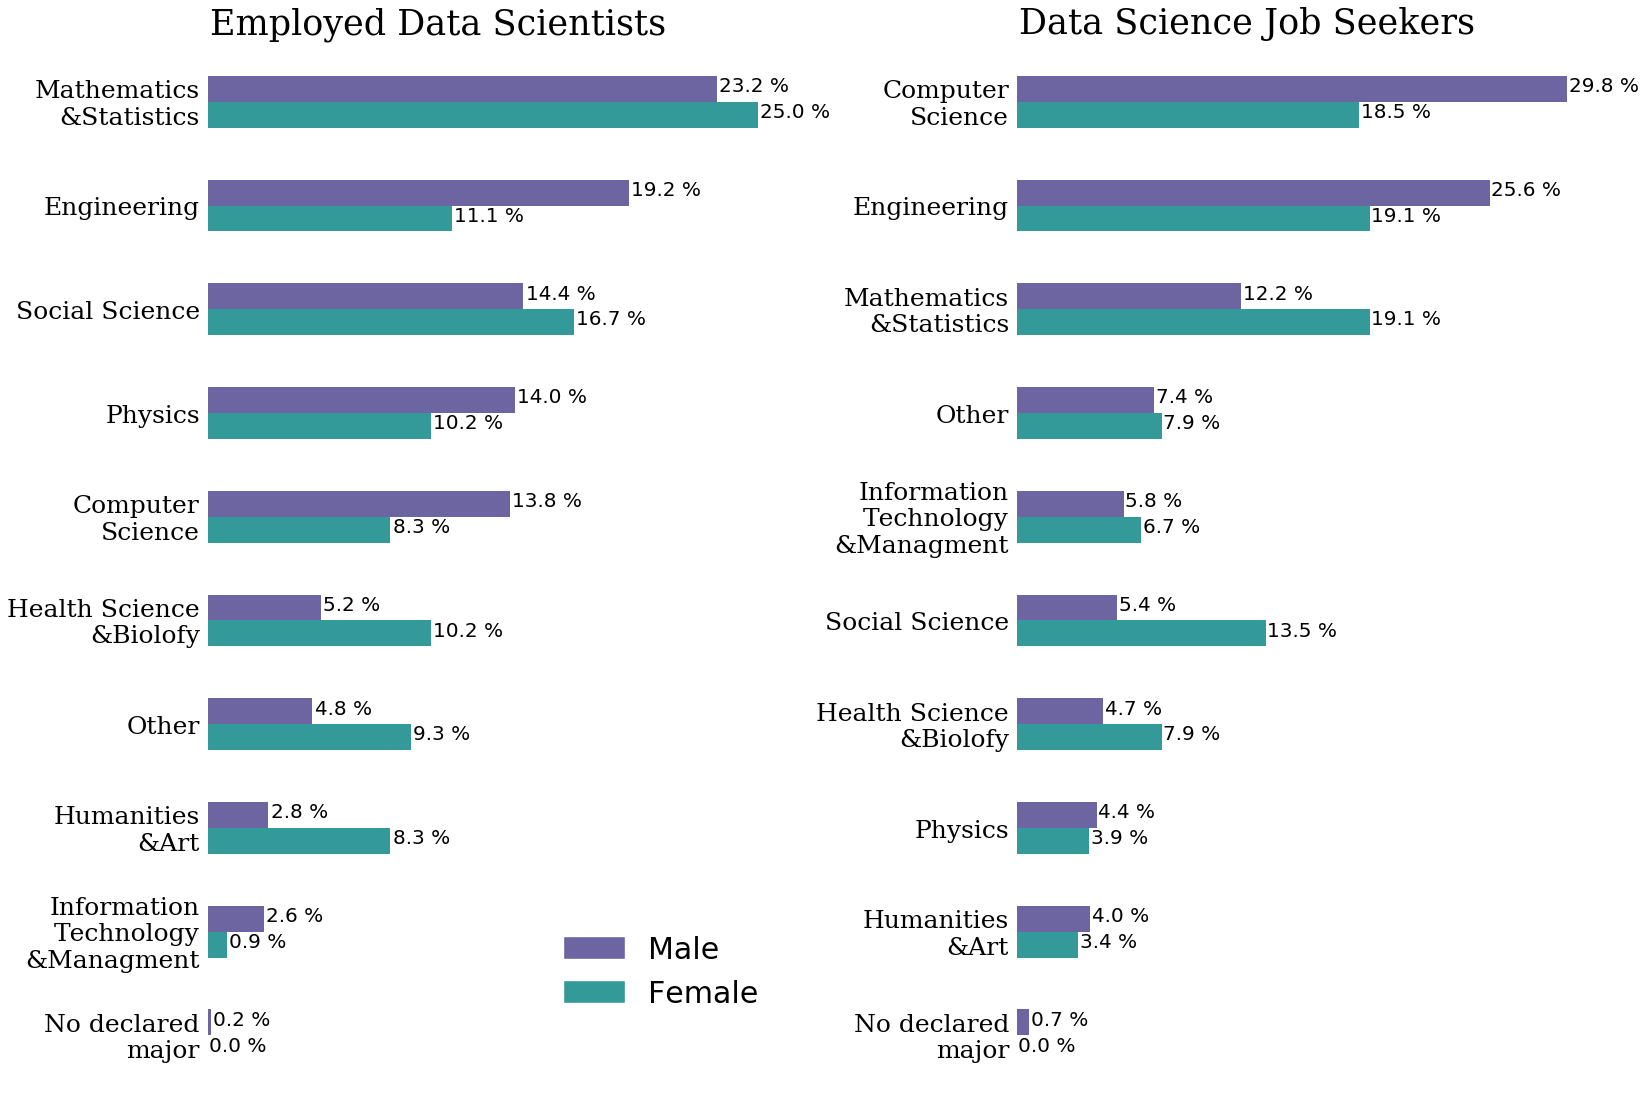

In [1223]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
plt.tight_layout(w_pad=20)

df5a[[ 'Female','Male']].plot(kind='barh',
               color=['teal','darkslateblue'],ax=ax[0],fontsize=13, alpha=.8)
ax[0].set_title('Employed Data Scientists',\
                  y=1.01,x=.4, fontsize=35,family='serif')
for i in ax[0].patches:
        ax[0].text(i.get_width()+.1, i.get_y()+.10, \
            '{:.1f} %'.format(i.get_width()), fontsize=20)
leg=ax[0].legend(['Male','Female'], loc='lower right', \
          fontsize=20,prop={'size':30},bbox_to_anchor=(1, .05)) 
leg.legendHandles[0].set_color('darkslateblue')
leg.legendHandles[1].set_color('teal')
ax[0].set_facecolor('white')
ax[0].yaxis.set_ticks_position('none')
ax[0].xaxis.set_ticks_position('none')
ax[0].get_xaxis().set_ticks([])
ax[0].set_yticklabels(['Mathematics\n&Statistics','Engineering',\
                      'Social Science','Physics', \
                       'Computer\nScience','Health Science\n&Biolofy',
                      'Other','Humanities\n&Art',\
                      'Information\nTechnology\n&Managment',\
                       'No declared\nmajor'][::-1],
                      size =25,family='serif', color='black')

leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

df5b[[ 'Female','Male']].plot(kind='barh',
               color=['teal','darkslateblue'],ax=ax[1],fontsize=13, alpha=.8)

for i in ax[1].patches:
        ax[1].text(i.get_width()+.1, i.get_y()+.10, \
            '{:.1f} %'.format(i.get_width()), fontsize=20)
ax[1].set_title('Data Science Job Seekers',\
                  y=1.01,x=.4, fontsize=35,family='serif')
leg=ax[1].legend().set_visible(False)
ax[1].set_facecolor('white')
ax[1].yaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[1].get_xaxis().set_ticks([])
ax[1].set_yticklabels(['Computer\nScience', 'Engineering',\
                       'Mathematics\n&Statistics','Other',\
                       'Information\nTechnology\n&Managment',\
                       'Social Science','Health Science\n&Biolofy',\
                       'Physics','Humanities\n&Art','No declared\nmajor'][::-1],\
                      size =25,family='serif', color='black')
plt.show()

In [1224]:
df2a_m=df1.loc[df1['CurrentJobStatus']=='EmployedFullTime']
df2a=df2a_m.loc[df2a_m['Major']=='Physics']
df3a=df2a.groupby(['GenderSelect','FormalEducation']).agg({'index': 'count'})
df4a= df3a.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4a['FormalEducation']=df4a['FormalEducation'].replace("Some college/university study \
without earning a bachelor's degree",'Some college')
df5a=pd.pivot_table(df4a, index=['GenderSelect'], values=['index'], \
                   columns='FormalEducation',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)
df5a

df2b_m=df1.loc[df1['CurrentJobStatus']!='EmployedFullTime']
df2b=df2b_m.loc[df2b_m['Major']=='Physics']
df3b=df2b.groupby(['GenderSelect','FormalEducation']).agg({'index': 'count'})
df4b= df3b.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4b['FormalEducation']=df4b['FormalEducation'].replace("Some college/university study \
without earning a bachelor's degree",'Some college')
df4b['FormalEducation']=df4b['FormalEducation'].replace("I did not complete any formal education past high school",'High school')
df5b=pd.pivot_table(df4b, index=['GenderSelect'], values=['index'], \
                   columns='FormalEducation',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)

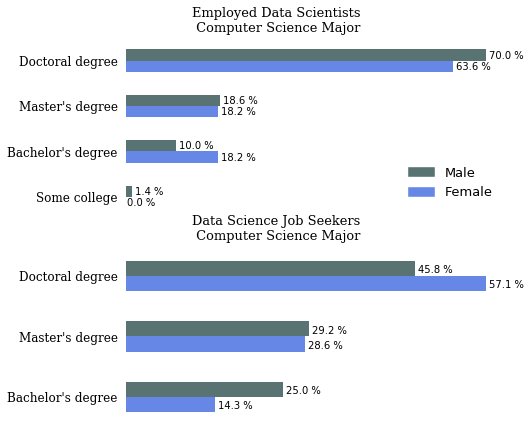

In [1225]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6))
plt.tight_layout(h_pad=.5)

df5a[[ 'Female','Male']].plot(kind='barh',
               color=['royalblue','darkslategrey'],ax=ax[0],fontsize=13, alpha=.8)
ax[0].set_title('Employed Data Scientists\n Computer Science Major',\
                  x=.4, fontsize=13,family='serif')
for i in ax[0].patches:
        ax[0].text(i.get_width()+.5, i.get_y()+.05, \
            '{:.1f} %'.format(i.get_width()), fontsize=10)

# handles,labels = ax[0].get_legend_handles_labels()

# handles = [handles[0], handles[1]]
# labels = [labels['Male'], labels['Female']]        
        
leg=ax[0].legend(['Male','Female'],  loc='lower right', \
          fontsize=10,prop={'size':13},bbox_to_anchor=(1, .05))
leg.legendHandles[0].set_color('darkslategrey')
leg.legendHandles[1].set_color('royalblue')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

ax[0].set_facecolor('white')
ax[0].yaxis.set_ticks_position('none')
ax[0].xaxis.set_ticks_position('none')
ax[0].get_xaxis().set_ticks([])
ax[0].set_yticklabels(df5a['FormalEducation'],
                      size =12,family='serif', color='black')



df5b[[ 'Female','Male']].plot(kind='barh',
               color=['royalblue','darkslategrey'],ax=ax[1],fontsize=13, alpha=.8)

for i in ax[1].patches:
        ax[1].text(i.get_width()+.5, i.get_y()+.05, \
            '{:.1f} %'.format(i.get_width()), fontsize=10)
ax[1].set_title('Data Science Job Seekers\n Computer Science Major',\
                  x=.4, fontsize=13,family='serif')
leg=ax[1].legend().set_visible(False)
ax[1].set_facecolor('white')
ax[1].yaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[1].get_xaxis().set_ticks([])
ax[1].set_yticklabels(df5b['FormalEducation'],\
                      size =12,family='serif', color='black')
plt.show()

In [1226]:
df2a_m['Major'].value_counts()

Mathematics or statistics               143
Engineering                             108
Social Science                          90 
Physics                                 82 
Computer Science                        78 
Health Science and Biology              37 
Other                                   34 
Humanities and Art                      23 
Information Technology and Managment    14 
No declared major                       1  
Name: Major, dtype: int64

In [1227]:
df2a_m=df1.loc[df1['CurrentJobStatus']=='EmployedFullTime']
df2a=df2a_m.loc[df2a_m['Major']=='Mathematics or statistics']
df3a=df2a.groupby(['GenderSelect','FormalEducation']).agg({'index': 'count'})
df4a= df3a.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4a['FormalEducation']=df4a['FormalEducation'].replace("Some college/university study \
without earning a bachelor's degree",'Some college')
df5a=pd.pivot_table(df4a, index=['GenderSelect'], values=['index'], \
                   columns='FormalEducation',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)


df2b_m=df1.loc[df1['CurrentJobStatus']=='Unemployed']
df2b=df2b_m.loc[df2b_m['Major']=='Mathematics or statistics']
df3b=df2b.groupby(['GenderSelect','FormalEducation']).agg({'index': 'count'})
df4b= df3b.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4b['FormalEducation']=df4b['FormalEducation'].replace("Some college/university study \
without earning a bachelor's degree",'Some college')
df4b['FormalEducation']=df4b['FormalEducation'].replace("I did not complete any formal education past high school",'High school')
df5b=pd.pivot_table(df4b, index=['GenderSelect'], values=['index'], \
                   columns='FormalEducation',aggfunc='mean').T.\
reset_index().iloc[:,1:].sort_values(by='Male',ascending=True)

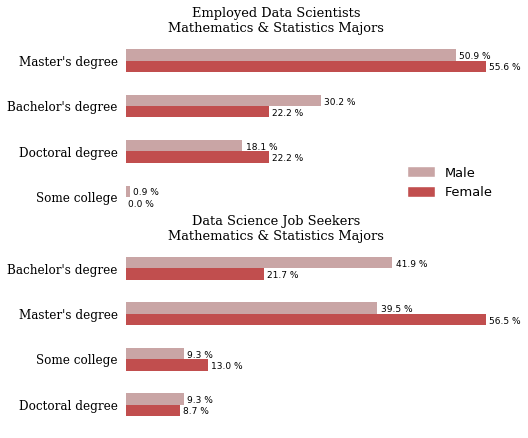

In [1228]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6))
plt.tight_layout(h_pad=.5)

df5a[[ 'Female','Male']].plot(kind='barh',
               color=['firebrick','rosybrown'],ax=ax[0],fontsize=13, alpha=.8)
ax[0].set_title('Employed Data Scientists\nMathematics & Statistics Majors',\
                  x=.4, fontsize=13,family='serif')


for i in ax[0].patches:
        ax[0].text(i.get_width()+.5, i.get_y()+.04, \
            '{:.1f} %'.format(i.get_width()), fontsize=9)

      
        
leg=ax[0].legend(['Male','Female'],  loc='lower right', \
          fontsize=10,prop={'size':13},bbox_to_anchor=(1, .05))
leg.legendHandles[0].set_color('rosybrown')
leg.legendHandles[1].set_color('firebrick')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

ax[0].set_facecolor('white')
ax[0].yaxis.set_ticks_position('none')
ax[0].xaxis.set_ticks_position('none')
ax[0].get_xaxis().set_ticks([])
ax[0].set_yticklabels(df5a['FormalEducation'],
                      size =12,family='serif', color='black')



df5b[[ 'Female','Male']].plot(kind='barh',
               color=['firebrick','rosybrown'],ax=ax[1],fontsize=13, alpha=.8)

for i in ax[1].patches:
        ax[1].text(i.get_width()+.5, i.get_y()+.04, \
            '{:.1f} %'.format(i.get_width()), fontsize=9)
ax[1].set_title('Data Science Job Seekers\nMathematics & Statistics Majors',\
                  x=.4, fontsize=13,family='serif')
leg=ax[1].legend().set_visible(False)
ax[1].set_facecolor('white')
ax[1].yaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[1].get_xaxis().set_ticks([])
ax[1].set_yticklabels(df5b['FormalEducation'],\
                      size =12,family='serif', color='black')
plt.show()

In [1229]:
df1['CurrentJobStatus'].value_counts()

EmployedFullTime    671
Unemployed          459
Switcher            368
Name: CurrentJobStatus, dtype: int64

In [1231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 14 columns):
index                            1498 non-null int64
GenderSelect                     1496 non-null object
Age_cat                          1498 non-null object
FormalEducation                  1473 non-null object
Major                            1340 non-null object
Tenure_cont                      1453 non-null float64
FirstTrainingSelect              1454 non-null object
EmploymentStatus                 1498 non-null object
LearningCategoryWork             1420 non-null float64
LearningCategorySelftTaught      1418 non-null float64
LearningCategoryOnlineCourses    1419 non-null float64
LearningCategoryUniversity       1420 non-null float64
LearningCategoryKaggle           1420 non-null float64
CurrentJobStatus                 1498 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 163.9+ KB


In [1254]:
df3=df1.loc[df1['CurrentJobStatus']=='Switcher']
df4=df3.groupby(['GenderSelect']).agg({'Tenure_cont': 'mean'})
df5= df4.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4

,Tenure_cont
GenderSelect,
Female,1.739
Male,1.644


In [1272]:
df3=df1.loc[df1['CurrentJobStatus']=='Switcher']
df4=df3.groupby(['GenderSelect']).agg({'Age': 'mean'})
df5= df4.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df4

KeyError: 'Age'

In [1264]:
df4=df1[['GenderSelect','Tenure_cont','CurrentJobStatus']].dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1497
Data columns (total 3 columns):
GenderSelect        1451 non-null object
Tenure_cont         1451 non-null float64
CurrentJobStatus    1451 non-null object
dtypes: float64(1), object(2)
memory usage: 45.3+ KB


In [1256]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Tenure_cont ~ GenderSelect',
                data=df4).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

              sum_sq      df     F  PR(>F)
GenderSelect 0.503   1.000   0.291 0.590  
Residual     590.381 342.000 nan   nan    


In [1266]:

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
formula = 'Tenure_cont ~ C(GenderSelect) + C(CurrentJobStatus)'
model = ols(formula, df4).fit()
aov_table = anova_lm(model, typ=2)
print (aov_table)

                      sum_sq       df       F  PR(>F)
C(GenderSelect)     7.193    1.000    5.392   0.020  
C(CurrentJobStatus) 1052.406 2.000    394.435 0.000  
Residual            1930.394 1447.000 nan     nan    


In [1269]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df4['Tenure_cont'], df4['GenderSelect'], df4['CurrentJobStatus'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

ValueError: group_order value 'EmployedFullTime' not found in groups

In [1233]:
# data5=data4[data4.EmploymentStatus.isin(['Employed full-time'])]
# data7=data5[data5.CurrentJobTitleSelect.isin(['Data Scientist'])]
data8=df1.groupby(['GenderSelect','CurrentJobStatus']).agg({'LearningCategoryWork': 'mean',\
                                                           'LearningCategoryUniversity':'mean',\
                                                          'LearningCategorySelftTaught':'mean',
                                                           'LearningCategoryOnlineCourses':'mean',
                                                           'LearningCategoryKaggle':'mean'}).reset_index()
data8

,GenderSelect,CurrentJobStatus,LearningCategoryWork,LearningCategoryUniversity,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryKaggle
0,Female,EmployedFullTime,24.000,29.882,24.258,17.706,1.917
1,Female,Switcher,8.812,30.797,20.870,34.826,2.449
2,Female,Unemployed,8.943,30.724,24.959,30.756,4.750
3,Male,EmployedFullTime,26.490,19.890,32.994,14.924,4.237
4,Male,Switcher,4.244,16.553,33.818,39.878,5.064
5,Male,Unemployed,8.403,24.433,30.490,26.992,6.324


In [220]:
filter_list = ['A social science', 'Biology',\
               "A humanities discipline",\
               'A health science', 'Psychology']
data1b=data1[data1.MajorSelect.isin(filter_list)]